In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [5]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Veri seti 200 müşteriden oluşmakta olup, müşterilere ait cinsiyet, yaş, yıllık gelir ve harcama skoru bilgilerini içermektedir. Eksik gözlem bulunmamaktadır.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [14]:
df["Genre"].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

### Sıradaki adımda kümeye ekleyeceğimiz değişkenleri belirliyoruz. Ayrıca değişkenlere standartlaştırma işlemi yapıyoruz.

In [25]:
X = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Standartlaştırdığımız ilk 5 sütundaki değerlerin öklid mesafesi aşağıda verilmiştir. K-means varsayılan olarak Öklid Mesafesi kullanır.

In [27]:
from sklearn.metrics import pairwise_distances
dist_matrix = pairwise_distances(X_scaled[:5, :], metric="euclidean")
print(dist_matrix)

[[0.         1.63681098 1.28368768 1.50337495 0.86544824]
 [1.63681098 0.         2.91275149 0.214878   1.74766453]
 [1.28368768 2.91275149 0.         2.76472669 1.53846858]
 [1.50337495 0.214878   2.76472669 0.         1.54736055]
 [0.86544824 1.74766453 1.53846858 1.54736055 0.        ]]


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

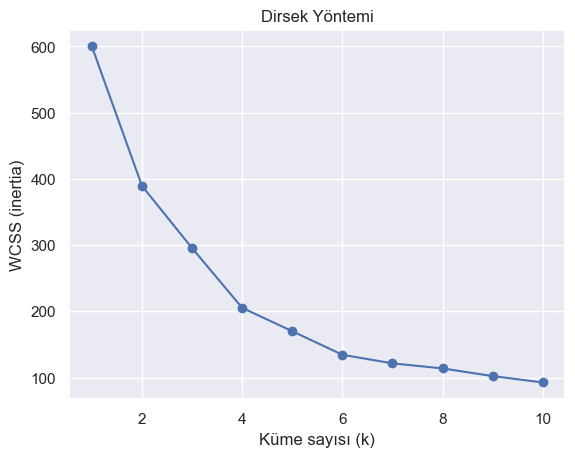

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = [] 

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Küme sayısı (k)")
plt.ylabel("WCSS (inertia)")
plt.title("Dirsek Yöntemi")
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

k = 2, silhouette score = 0.3355
k = 3, silhouette score = 0.3579
k = 4, silhouette score = 0.4040
k = 5, silhouette score = 0.4085
k = 6, silhouette score = 0.4311
k = 7, silhouette score = 0.4101


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k = 8, silhouette score = 0.3674
k = 9, silhouette score = 0.3744
k = 10, silhouette score = 0.3619


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


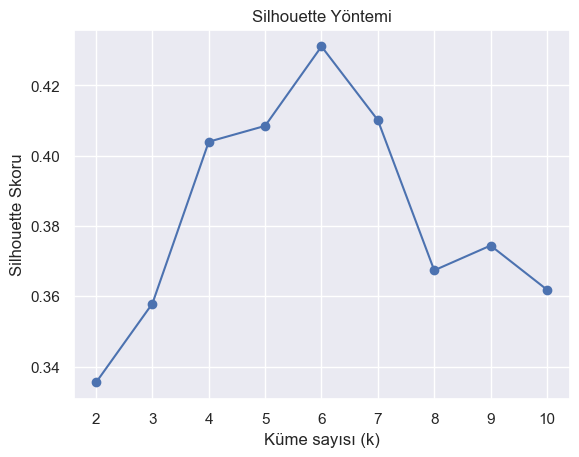

In [36]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    print(f"k = {k}, silhouette score = {sil:.4f}")

plt.figure()
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel("Küme sayısı (k)")
plt.ylabel("Silhouette Skoru")
plt.title("Silhouette Yöntemi")
plt.show()

### Silhouette skoru, kümelerin birbirinden ne kadar iyi ayrıldığını ve ne kadar kompakt olduğunu ölçer. Skorun en yüksek olduğu k değeri, daha başarılı kümeleme yapıldığını gösterir.

### Seçilen k = 6 değeri ile K-ortalama (K-Means) algoritması uygulanmış ve her müşteri altı kümeden birine atanmıştır.

In [41]:
from sklearn.cluster import KMeans
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df["Cluster"] = cluster_labels

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:

cluster_means = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_means)
cluster_counts = df["Cluster"].value_counts().sort_index()
print(cluster_counts)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        32.692308           86.538462               82.128205
2        25.560000           26.480000               76.240000
3        26.125000           59.425000               44.450000
4        44.000000           90.133333               17.933333
5        45.523810           26.285714               19.380952
Cluster
0    45
1    39
2    25
3    40
4    30
5    21
Name: count, dtype: int64


### Görselleştirme

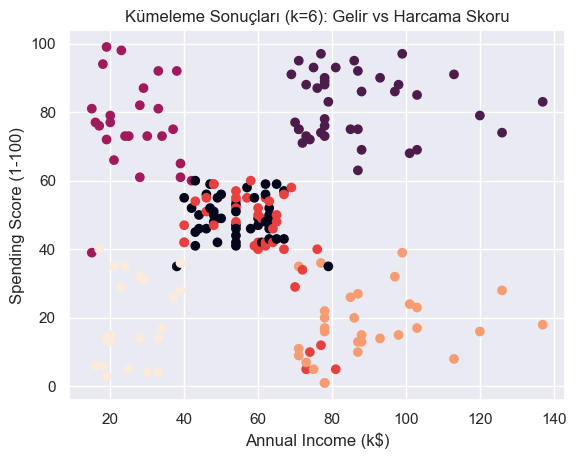

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Kümeleme Sonuçları (k=6): Gelir vs Harcama Skoru")
plt.show()


#### Grafik, yıllık gelir ve harcama skoru düzleminde altı farklı müşteri segmentinin ayrıldığını göstermektedir. Özellikle yüksek gelir–yüksek harcama (Cluster 4) ve yüksek gelir–düşük harcama (Cluster 2) kümeleri net şekilde ayrışmaktadır.

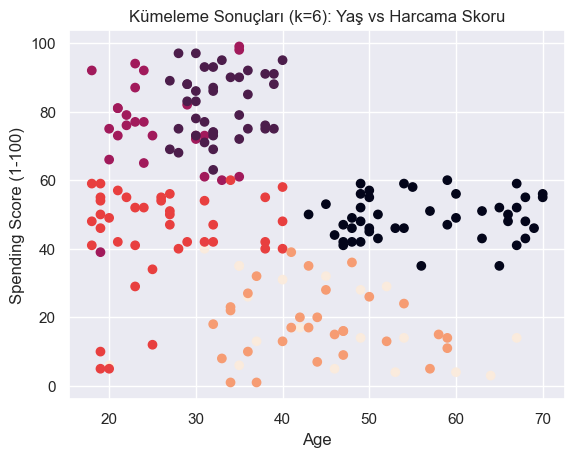

In [52]:
plt.figure()
plt.scatter(df["Age"], df["Spending Score (1-100)"], c=df["Cluster"])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Kümeleme Sonuçları (k=6): Yaş vs Harcama Skoru")
plt.show()


#### Yaş–harcama ilişkisi incelendiğinde, genç yaş grubunda hem yüksek hem düşük harcama yapan müşterilerin bulunduğu, ileri yaş gruplarında ise daha çok orta ve düşük harcama düzeylerinin görüldüğü söylenebilir.